<a href="https://colab.research.google.com/github/HyEd-Aprendizaje-Maquina/3-regresion-lineal-y-logistica-seminario/blob/main/Regresi%C3%B3nLineal_GradienteDescenso_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
# Cargar el conjunto de datos de Advertising
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
data = pd.read_csv(url)
data.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


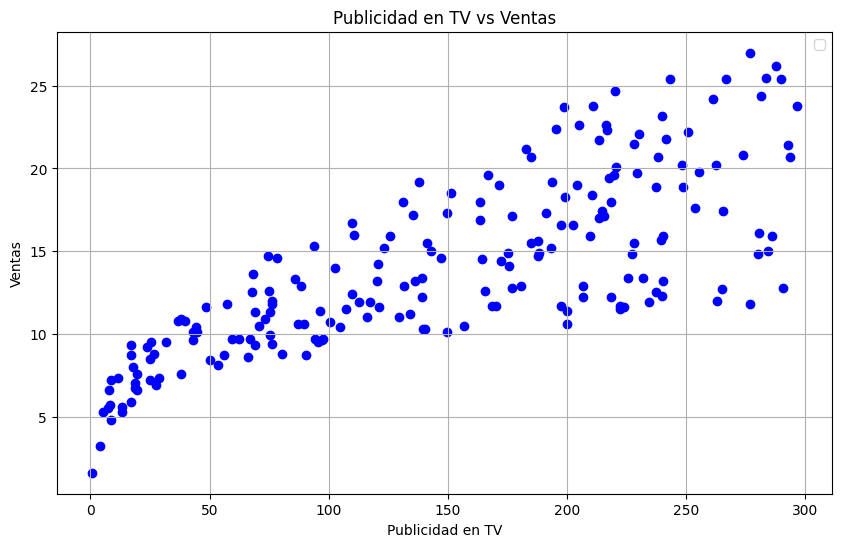

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(data['TV'], data['sales'], color='blue')
plt.title('Publicidad en TV vs Ventas')
plt.xlabel('Publicidad en TV')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Seleccionar las columnas relevantes (TV y Sales)
X = data[['TV']].values  # Gasto en publicidad en TV
y = data[['sales']].values  # Ventas generadas

In [19]:
X[0:10]

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8]])

In [20]:
y[0:10]

array([[22.1],
       [10.4],
       [ 9.3],
       [18.5],
       [12.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [10.6]])

In [21]:
# Normalizar los datos para mejorar la convergencia
X = (X - np.mean(X)) / np.std(X)
y = (y - np.mean(y)) / np.std(y)

In [23]:
# Agregar un término de sesgo (bias) a X
X_bias = np.c_[np.ones((X.shape[0], 1)), X]

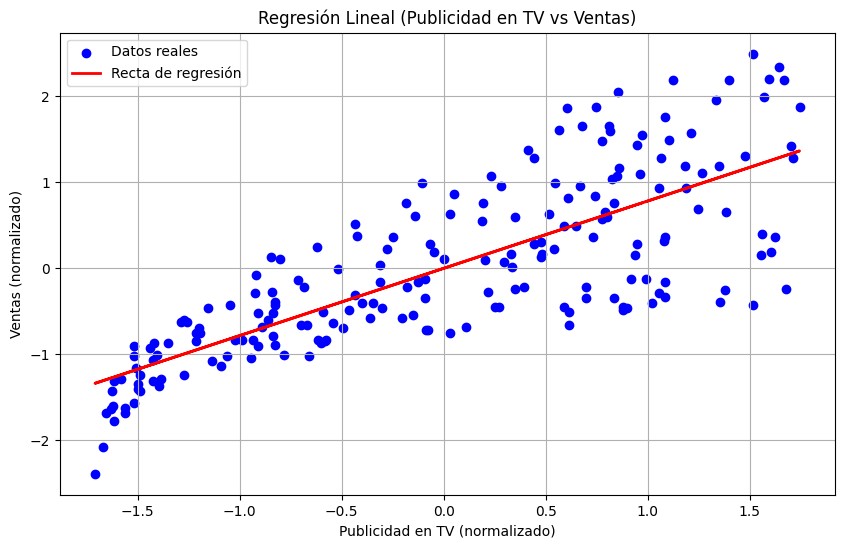

Theta final (parámetros):
Intercepto: -2.6862754594545474e-05, Pendiente: 0.7821753083693614


In [24]:
# Inicializar parámetros theta aleatoriamente
theta = np.random.randn(2, 1)

# Configurar hiperparámetros
tasa_aprendizaje = 0.01
iteraciones = 1000

# Implementar descenso por gradiente
m = len(y)
for i in range(iteraciones):
    predicciones = X_bias.dot(theta)
    error = predicciones - y
    gradiente = (1 / m) * X_bias.T.dot(error)
    theta -= tasa_aprendizaje * gradiente

# Calcular la recta de regresión
predicciones_finales = X_bias.dot(theta)

# Graficar los datos y la recta de regresión
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.plot(X, predicciones_finales, color='red', linewidth=2, label='Recta de regresión')
plt.title('Regresión Lineal (Publicidad en TV vs Ventas)')
plt.xlabel('Publicidad en TV (normalizado)')
plt.ylabel('Ventas (normalizado)')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar los valores finales de theta
print(f'Theta final (parámetros):\nIntercepto: {theta[0][0]}, Pendiente: {theta[1][0]}')